In [6]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint

from keras import backend as K

from util.plots import plot_history
from util.models import cnn_net


from glob import glob
import os
import util.image_import as ii

Using TensorFlow backend.


In [7]:
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [8]:
mean_image_train = ii.calulate_mean("../dataset3/res_crop/train")

def subtract_mean(img):
    return img - mean_image_train

In [4]:
train_path = '../dataset3/res_crop/train'
test_path = '../dataset3/res_crop/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35),
        preprocessing_function=subtract_mean)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        preprocessing_function=subtract_mean)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size)

# Validation data generator
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size)

Found 1874 images belonging to 8 classes.
Found 471 images belonging to 8 classes.


<b>CNN</b> proved best in classification, therefor it is now trained on the cropped images.

In [5]:
# Checkpoint
file_path = 'saved_models/crop_cnn.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

In [6]:
model = cnn_net()

In [7]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1874 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=471 // batch_size,
            use_multiprocessing=True,
            workers=4,
            callbacks=callback_list
)

Epoch 1/100
58/58 [==============================] - 25s 432ms/step - loss: 1.9023 - acc: 0.2519 - val_loss: 1.5283 - val_acc: 0.4554

Epoch 00001: val_acc improved from -inf to 0.45536, saving model to saved_models/crop_cnn.e01-a0.46.hdf5
Epoch 2/100
58/58 [==============================] - 22s 386ms/step - loss: 1.5117 - acc: 0.4250 - val_loss: 1.1853 - val_acc: 0.6287

Epoch 00002: val_acc improved from 0.45536 to 0.62870, saving model to saved_models/crop_cnn.e02-a0.63.hdf5
Epoch 3/100
58/58 [==============================] - 28s 482ms/step - loss: 1.3371 - acc: 0.4670 - val_loss: 0.9688 - val_acc: 0.6538

Epoch 00003: val_acc improved from 0.62870 to 0.65376, saving model to saved_models/crop_cnn.e03-a0.65.hdf5
Epoch 4/100
58/58 [==============================] - 35s 606ms/step - loss: 1.3231 - acc: 0.4657 - val_loss: 0.9292 - val_acc: 0.6902

Epoch 00004: val_acc improved from 0.65376 to 0.69021, saving model to saved_models/crop_cnn.e04-a0.69.hdf5
Epoch 5/100
58/58 [============

58/58 [==============================] - 27s 465ms/step - loss: 0.5303 - acc: 0.7720 - val_loss: 0.3167 - val_acc: 0.8588

Epoch 00041: val_acc did not improve from 0.91116
Epoch 42/100
58/58 [==============================] - 26s 453ms/step - loss: 0.5685 - acc: 0.7532 - val_loss: 0.2533 - val_acc: 0.8975

Epoch 00042: val_acc did not improve from 0.91116
Epoch 43/100
58/58 [==============================] - 24s 416ms/step - loss: 0.5737 - acc: 0.7491 - val_loss: 0.3072 - val_acc: 0.9021

Epoch 00043: val_acc did not improve from 0.91116
Epoch 44/100
58/58 [==============================] - 24s 407ms/step - loss: 0.5870 - acc: 0.7417 - val_loss: 0.2560 - val_acc: 0.8952

Epoch 00044: val_acc did not improve from 0.91116
Epoch 45/100
58/58 [==============================] - 25s 431ms/step - loss: 0.5287 - acc: 0.7609 - val_loss: 0.2943 - val_acc: 0.9089

Epoch 00045: val_acc did not improve from 0.91116
Epoch 46/100
58/58 [==============================] - 25s 428ms/step - loss: 0.5444


Epoch 00083: val_acc did not improve from 0.95444
Epoch 84/100
58/58 [==============================] - 27s 468ms/step - loss: 0.4386 - acc: 0.8416 - val_loss: 0.1778 - val_acc: 0.9522

Epoch 00084: val_acc did not improve from 0.95444
Epoch 85/100
58/58 [==============================] - 27s 461ms/step - loss: 0.3556 - acc: 0.8611 - val_loss: 0.2042 - val_acc: 0.9089

Epoch 00085: val_acc did not improve from 0.95444
Epoch 86/100
58/58 [==============================] - 27s 459ms/step - loss: 0.3109 - acc: 0.8822 - val_loss: 0.2295 - val_acc: 0.9362

Epoch 00086: val_acc did not improve from 0.95444
Epoch 87/100
58/58 [==============================] - 27s 472ms/step - loss: 0.3137 - acc: 0.8766 - val_loss: 0.1566 - val_acc: 0.9317

Epoch 00087: val_acc did not improve from 0.95444
Epoch 88/100
58/58 [==============================] - 26s 441ms/step - loss: 0.2920 - acc: 0.8949 - val_loss: 0.1262 - val_acc: 0.9590

Epoch 00088: val_acc improved from 0.95444 to 0.95900, saving model t

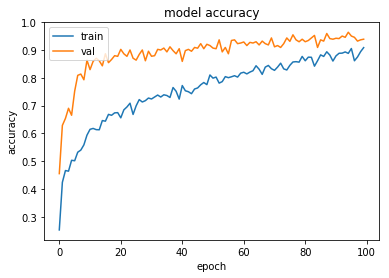

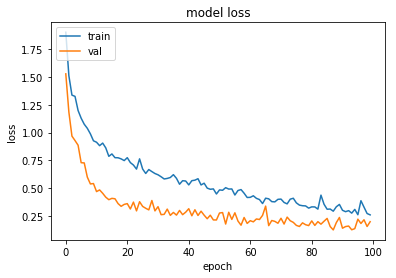

In [9]:
plot_history(history, save=True, path='saved_plots/', name='crop_cnn.e95-a0.96')

In [9]:
# Save model
# model.save('crop_cnn.h5')

<h1>Import saved model</h1>

In [10]:
from util.models import load_model
from util.models import measure_accuracy

In [11]:
model = cnn_net()
model.load_weights('saved_models/crop_cnn.e95-a0.96.hdf5')

In [19]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=32)

32/32 [==============================] - 0s 1ms/step


[0.1206338033080101, 1.0]

In [20]:
predictions = model.predict(imgs)
measure_accuracy(predictions, labels)

1.0

<h1>Combined with background subtraction</h1>

In [72]:
from background_subtraction.background_subtraction import background_sub
import cv2
import glob
import matplotlib.pyplot as plt
import random

In [95]:
mask = cv2.imread('background_subtraction/bgd_mask.jpg', cv2.IMREAD_GRAYSCALE)
background_img = cv2.imread('background_subtraction/avg_background.jpg', cv2.IMREAD_COLOR)

objs = ['arm', 'background', 'bun', 'carrots', 'catfood_beef', 'catfood_salmon', 'ketchup', 'potato']
images = [cv2.imread(file) for file in glob.glob("../dataset3/res_still/test/"+objs[2]+"/*.jpg")]

classes = ['arm', 'background', 'bun', 'carrots', 'catfood_beef', 'catfood_salmon', 'ketchup', 'potato']

def subm(image):
    img = subtract_mean(image)
    return img 

def predict_roi(image):
    roi, coordinates = background_sub(image, background_img, mask)
    (x_left, x_right, y_up, y_down) = roi
    crop = image[y_up:y_down, x_left:x_right]
    crop = cv2.resize(crop,(224, 224))
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    crop = subtract_mean(crop)*1./255
    crop = np.expand_dims(crop, axis=0)
    prediction = model.predict(crop)
    predicted_class = np.argmax(prediction)
    return predicted_class, coordinates

def draw_bounding_box(image):
    prediction, bounding_box = predict_roi(image)
    #img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = image.copy()
    x,y,w,h = bounding_box
    pclass = classes[prediction]
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(img, pclass, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), lineType=cv2.LINE_AA, thickness=3) 
    print('Preciction: '+pclass)
    return img

In [98]:
images = []
labels = []
for i in range(len(objs)):
    imgs = []
    imgs = [cv2.imread(file) for file in glob.glob("../dataset3/res_still/test/"+objs[i]+"/*.jpg")]
    for img in imgs:
        images.append(img)
        labels.append(i)
        
combi = list(zip(images,labels))
random.shuffle(combi)
images, labels = zip(*combi)

Preciction: bun


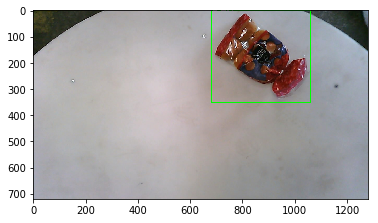

In [12]:
boxd = draw_bounding_box(images[0])
plt.imshow(boxd)

Preciction: ketchup
Preciction: carrots
Preciction: catfood_salmon
Preciction: catfood_salmon
Preciction: carrots
Preciction: ketchup
Preciction: potato
Preciction: bun
Preciction: bun
Preciction: potato
Preciction: carrots
Preciction: arm
Preciction: catfood_salmon
Preciction: catfood_salmon
Preciction: catfood_salmon
Preciction: ketchup
Preciction: potato
Preciction: ketchup
Preciction: background
Preciction: ketchup


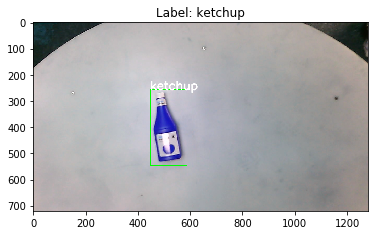

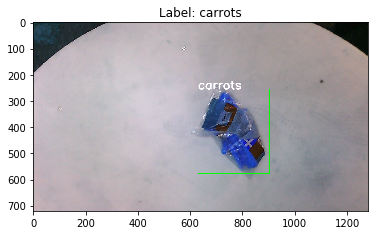

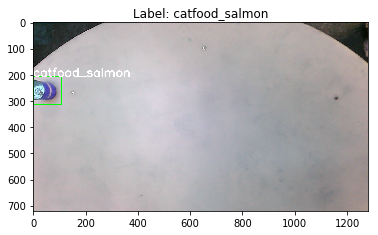

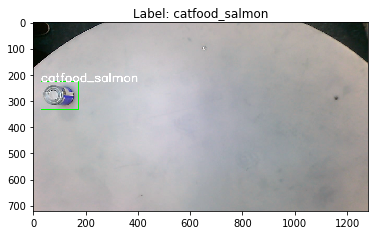

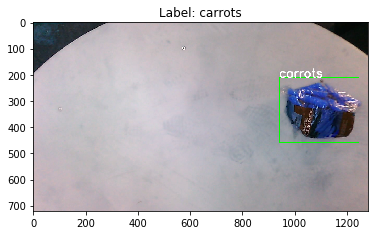

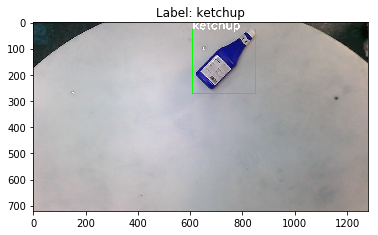

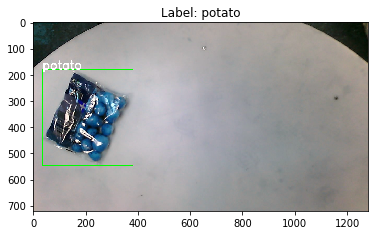

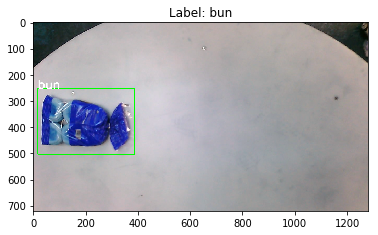

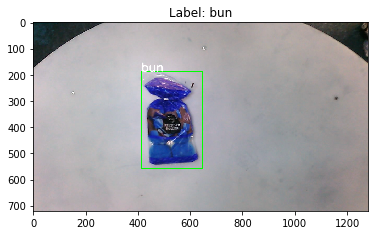

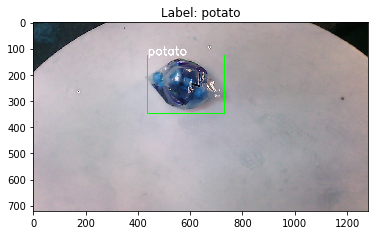

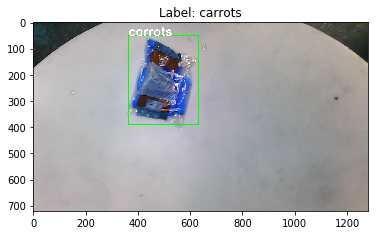

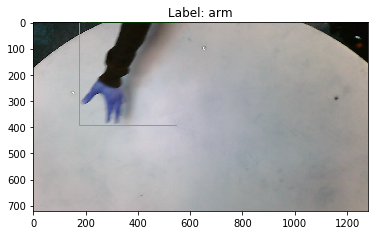

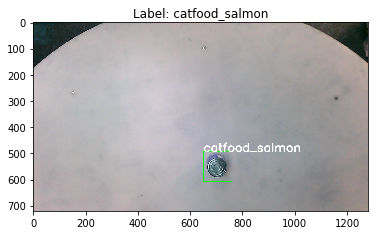

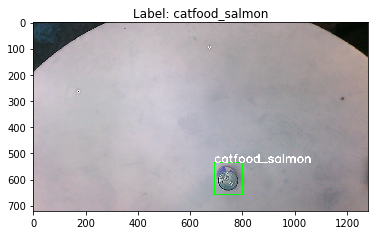

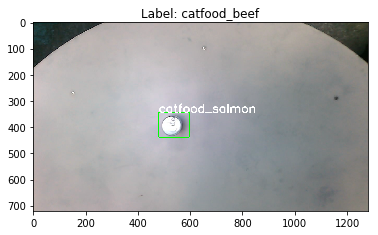

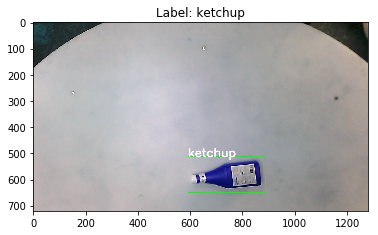

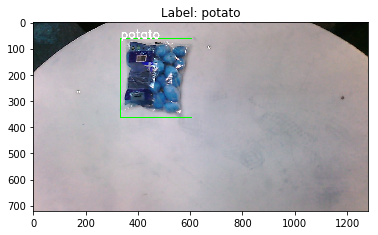

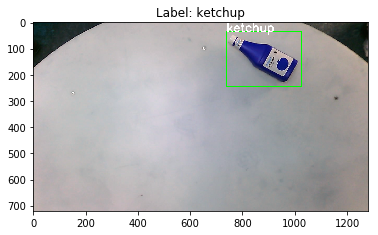

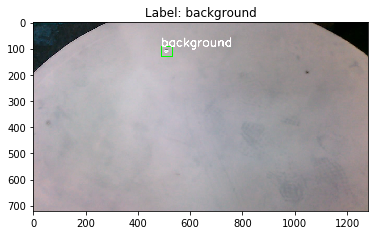

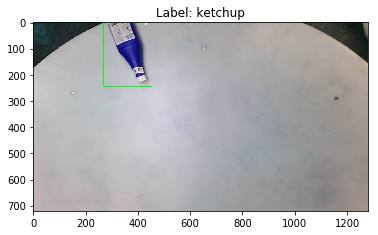

In [108]:
for i in range(20):
    plt.figure(i)
    plt.title('Label: '+classes[labels[i+20]])
    plt.imshow(draw_bounding_box(images[i+20]))
    

In [ ]:
#measure_accuracy(preds, ground_truth)

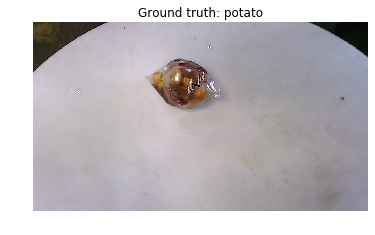

In [110]:
# salmon 0, table 1, carrots 7, Ketchup 9, bun 17, beef 19, arm 49, potato 29
aa=29
fig = plt.figure()
plt.title('Ground truth: '+classes[labels[aa]])
plt.axis('off')
plt.imshow(cv2.cvtColor(images[aa], cv2.COLOR_BGR2RGB))

In [112]:
# potato: 1, beef: 8, bun: 7, Ketchup: 9, salmon: 12, carrot: 13, table: 33, arm: 44
labls = ['potato', 'beef', 'bun', 'ketchup', 'salmon', 'carrot', 'table', 'arm']
nums = [29, 19, 17, 9, 0, 7, 1, 49]
for i in range(len(nums)):
    cv2.imwrite('/home/emil/Documents/github/BSc-PRO/Localization/test/'+labls[i]+'Loc.png',draw_bounding_box(images[nums[i]]))
    cv2.imwrite('/home/emil/Documents/github/BSc-PRO/Localization/test/'+labls[i]+'.png',images[nums[i]])

Preciction: potato
Preciction: catfood_beef
Preciction: bun
Preciction: ketchup
Preciction: catfood_salmon
Preciction: carrots
Preciction: background
Preciction: arm
